


<body>
 <a align="center" href="https://github.com/MurtadhaM/Data_Mining">
 <h1  align="center"><img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" width="50"/> Data Mining Group Project</h1>


---
   
   <h1 align="center">
Github Repo

</h1>
</a>
</body>
 <h2 align="center" >Team: <img src="https://emojis.slackmojis.com/emojis/images/1531849430/4246/blob-sunglasses.gif?1531849430" width="30"/></h2>

<h4 align="center">
Coupet, Alexa
</h4>
<h4 align="center">
Marsh, Steven
</h4><h4 align="center">Farley, Douglas</h4><h4 align="center">
                    Marzouq, Murtadha 
</h4>

<h2 align="center">Notes: <img align="center" src="https://emojis.slackmojis.com/emojis/images/1561763719/5906/this-is-fine-fire.gif?1561763719"  width="10%"></h2>

 <div width="100%"  border="1" >                    <tr>             <td>                <table border = "1"><tr><th>🎁 Task⭐</th>         <th>📬 Framework📬</th>                   </tr>                   <tr>                      <td>Step 1: Loading data</td>                      <td><a href="https://github.com/twintproject/twint">Twint</a></td>                   </tr>                   <tr>                      <td>Step 2: Pre-processing the tweets/articles </td>                      <td><a href="https://spacy.io/usage/v3-2">SpaCy</a></td>   
 <tr>
 <td> Step 3: Data analysis and visualization</td> 
  <td><a href="https://pandas.pydata.org/">Pandas</a></td> 
    <tr>
   <td> Important Step: Topic Modeling</td> 
  <td><a href="https://scikit-learn.org/stable/model_selection.html#model-selection/">pyldavis</a></td> 
         </tr>      
 </tr>
 </tr>                </table>             </td>          </tr>                 </div>
<h4 align="center"><b>Resources Used:</b></h4>
<ol>
<li>
<p> https://github.com/twintproject/twint/wiki/Configuration </p>
</li>
<li>
<p>https://medium.com/@pragya_paudyal/scraping-tweet-using-twint-and-analyzing-with-nlp-932e01ad5587</p>
</li>

<li>
<p> https://health-tweets-topics.herokuapp.com/ </p>
</li>

<li>
<p> https://pub.towardsai.net/tweet-topic-modeling-part-3-using-short-text-topic-modeling-on-tweets-bc969a827fef </p>
</li>

</ol>



In [ ]:
!pip install PyDrive
!pip install gensim matplotlib nltk numpy pandas pyLDAvis scikit_learn spacy seaborn gensim  twint PyDrive
!pip install gensim
!pip install pyldavis
!python -m spacy download en
!!pip install  --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip install nltk

In [ ]:
# DISABLINNG ALL WARNINGS
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from datetime import timedelta
import datetime
import nest_asyncio
import pandas as pd
import spacy
import re
import nltk
import twint
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nest_asyncio.apply()
# Downloading Filters and Dicts
nltk.download('wordnet')
wnl = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('punkt')


 
# Step 1 Loading data
---
:⛱
**Successfully load the data you choose to analyze into memory**⛱
<img align="center" width="50%" src="https://media.makeameme.org/created/go-ahead-load.jpg"/>


In [62]:
# FETCHING THE TWEETS
# Set the limit of tweets to be scraped
limit_of_tweets = 100
def run_twint():

    #since_in_day = 5
    #since = (datetime.datetime.now() - timedelta(since_in_day)).strftime('%Y-%m-%d')
    c = twint.Config()
    c.Search = 'Police'
    c.Limit = limit_of_tweets
    c.Store_csv = True
    #c.Since = since
    c.Output = 'output.csv'
    c.Pandas = True
    c.Pandas_clean = True
    c.Lang = "en"
    twint.run.Search(c)
    df = twint.storage.panda.Tweets_df 
    return df


stop_words = set(stopwords.words('english'))
data = run_twint()


1464502496483635204 2021-11-27 07:52:58 +0000 <Darkamahaul> Hyderabad: Police nab 4 gangs and seized 92 mobiles.  https://t.co/pCQx3s90vC
1464502496366370820 2021-11-27 07:52:58 +0000 <marquestrevon_> @MissTishaRain Loool I feel your pain man. I’m calling the police at 10:59pm tbh
1464502492226490371 2021-11-27 07:52:57 +0000 <hypmicbot> She is the advisor to the Prime Minister and Superintendent General of the Metropolitan Police Department, Administrative Supervision Director-General, Ichijiku Kadenokouji. She is the number two of the current government.
1464502478594998278 2021-11-27 07:52:54 +0000 <KeshriMadan> @nawabmalikncp Nawab ab aam aadami ban gaya. Don't u trust mh police and need support from people to identify. DAR ACHHA LAGA
1464502469342502912 2021-11-27 07:52:52 +0000 <DubinBen> @placardabuse @NYPD52Pct @NYCTBus @SarahMeyerNYC @NYCSpeakerCoJo @RidersAlliance @NYPDTransport @NYPDShea @GovKathyHochul @Vanessalgibson @StreetsblogNYC @EricDinowitzNYC I have so many question

In [63]:
# convert datetime to date and add year column
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year
data['date'] = data['date'].dt.date
data.head()


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,year
0,1464502496483635204,1464502496483635204,1.638000e+12,2021-11-27,+0000,,Hyderabad: Police nab 4 gangs and seized 92 mobiles. https://t.co/pCQx3s90vC,en,[],[],3139773775,3139773775,Darkamahaul,Sunny,6,07,https://twitter.com/Darkamahaul/status/1464502496483635204,[],[https://pbs.twimg.com/media/FFL1JqKVkAU9UxY.jpg],1,https://pbs.twimg.com/media/FFL1JqKVkAU9UxY.jpg,False,1,0,0,,Police,,,,,,,[],,,,,2021
1,1464502496366370820,1464497634325024768,1.638000e+12,2021-11-27,+0000,,@MissTishaRain Loool I feel your pain man. I’m calling the police at 10:59pm tbh,en,[],[],1297943485463629831,1297943485463629831,marquestrevon_,santiago.,6,07,https://twitter.com/marquestrevon_/status/1464502496366370820,[],[],0,,False,0,0,0,,Police,,,,,,,"[{'screen_name': 'MissTishaRain', 'name': 'Sa’btisha Louise 🇯🇲', 'id': '57444519'}]",,,,,2021
2,1464502492226490371,1464502492226490371,1.638000e+12,2021-11-27,+0000,,"She is the advisor to the Prime Minister and Superintendent General of the Metropolitan Police Department, Administrative Supervision Director-General, Ichijiku Kadenokouji. She is the number two ...",en,[],[],1382458201975762946,1382458201975762946,hypmicbot,hypnosis mic quotes and lyrics,6,07,https://twitter.com/hypmicbot/status/1464502492226490371,[],[],0,,False,0,0,0,,Police,,,,,,,[],,,,,2021
3,1464502478594998278,1464230399786119175,1.638000e+12,2021-11-27,+0000,,@nawabmalikncp Nawab ab aam aadami ban gaya. Don't u trust mh police and need support from people to identify. DAR ACHHA LAGA,en,[],[],628330482,628330482,KeshriMadan,Mk,6,07,https://twitter.com/KeshriMadan/status/1464502478594998278,[],[],0,,False,0,0,0,,Police,,,,,,,"[{'screen_name': 'nawabmalikncp', 'name': 'Nawab Malik نواب ملک नवाब मलिक', 'id': '1172482152'}]",,,,,2021
4,1464502469342502912,1450570511222706180,1.638000e+12,2021-11-27,+0000,,@placardabuse @NYPD52Pct @NYCTBus @SarahMeyerNYC @NYCSpeakerCoJo @RidersAlliance @NYPDTransport @NYPDShea @GovKathyHochul @Vanessalgibson @StreetsblogNYC @EricDinowitzNYC I have so many questions....,en,[],[],1096860386,1096860386,DubinBen,Ben Dubin,6,07,https://twitter.com/DubinBen/status/1464502469342502912,[],[],0,,False,0,0,0,,Police,,,,,,,"[{'screen_name': 'placardabuse', 'name': 'placard corruption', 'id': '4867386993'}, {'screen_name': 'NYPD52Pct', 'name': 'NYPD 52nd Precinct', 'id': '2372140824'}, {'screen_name': 'NYCTBus', 'name...",,,,,2021


# Step 2: Pre-processing the tweets/articles


---

🔱**Functions to tokenize, lemmizize and trim the data**🔱

<img width="20%" src="https://memegenerator.net/img/instances/65953839.jpg"/>

In [64]:
# Simple Text Cleaning 
import string
# Cleaning the tweets Step 2
def clean_tweets_tb(input):
    punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
    text = str(input)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub("@[A-Za-z0-9]+", "", text)
    text = re.sub(r"@[A-Za-z0-9]+", "", text)
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    text = re.sub(r"_[A-Za-z0-9]+", "", text)
    text = re.sub(r"__", "", text)
    text = re.sub(' +', ' ', text)
    text = re.sub('[' + punctuation + ']+', ' ', text)  # strip punctuation
    text = re.sub('\s+', ' ', text)  # remove double spacing
    text = re.sub('’', ' ', text)  # remove apostrophe'
    text = re.sub('\'', ' ', text)  # remove double spacing
    text = re.sub('([0-9]+)', '', text)  # remove numbers
    text = "".join([char for char in text if char not in string.punctuation])
    text = text.lower()  # Lower text
    return text

In [65]:

import pandas as pd
import numpy as np
import json
import re
import gzip
import spacy
import gensim
from gensim import corpora
import pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
# lemmatization (2pt) Method #2 TESTED


def lem(text):
    
    doc = nlp(u'{}'.format(text))
    tokens = []
    for token in doc:
        tokens.append(token)
    lemmatized_sentence = " ".join([token.lemma_ for token in doc if len(token) >  3 ])
    return lemmatized_sentence



In [67]:
lemize_text = True

# Applying PreProcessing
def apply_preprocessing(tweets):
    print('Applying Preprocessing...')
    # Setting up the stop words
    stop = nltk.corpus.stopwords.words('english')
    stop.extend(additional_stop_words)
    # cleaning the text of each tweet
    tweets['tweet'] = tweets['tweet'].apply(clean_tweets_tb)
    # split the tweets into words and remove words that are not in the stop list and less than 3 characters
    print('Removing Stop Words...')
    tweets['tweet'] = tweets['tweet'].apply(
        lambda x: " ".join(x for x in str(x).split() if x not in stop and len(x) > 3))

    # Apply lemmatization if the lemize_text is True
    if(lemize_text):
        print('Lemmatizing...')
        tweets['tweet'] = tweets['tweet'].apply(lambda x:   lem(x))
    tweets['cleaned_tweets'] = tweets['tweet']
    return tweets


In [68]:
additional_stop_words = ["amp", "https", "co", "rt", "new", "let",
                         "also", "still", "one", "people", "gt"]



data = apply_preprocessing(data)

data['cleaned_tweets']


Applying Preprocessing...
Removing Stop Words...
Lemmatizing...


0                                                                                                                                           hyderabad police gang seize mobile
1                                                                                                                                                  loool feel pain call police
2      advisor prime minister superintendent general metropolitan police department administrative supervision director general ichijiku kadenokouji number current government
3                                                                                                              nawab aadami gaya trust police need support identify achha laga
4                                    many question police equipment retail shop exist police department police equipment vetting nypd ensure equipment compliant relevant rule
                                                                                        ...                                  

#  Topic Modeling 

In [69]:

r = [process_text(x,stem=False).split() for x in data['tweet'].tolist()] 
dictionary = corpora.Dictionary(r)
corpus = [dictionary.doc2bow(rev) for rev in r]#initialize model and print topics
doc_term_matrix = [dictionary.doc2bow(rev) for rev in r]
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)
lda_model.print_topics()

vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

pyLDAvis.enable_notebook()
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.115721  0.116326       1        1  21.818860
1      0.018401 -0.138833       2        1  21.185582
3     -0.169369  0.067219       3        1  15.346396
2      0.042553  0.002500       4        1  13.253944
4     -0.007016 -0.035224       5        1   9.534287
0     -0.007497 -0.014349       6        1   9.444487
6      0.007206  0.002361       7        1   9.416444, topic_info=         Term       Freq      Total Category  logprob  loglift
181     pcmax  11.000000  11.000000  Default  30.0000  30.0000
179         j   6.000000   6.000000  Default  29.0000  29.0000
180      kiyu   6.000000   6.000000  Default  28.0000  28.0000
182     ukiyu   6.000000   6.000000  Default  27.0000  27.0000
176     shoot   5.000000   5.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
301     would   0.588084   2.399950   Topic7  -5.3368   0.9564
175       say   0.588083   2.253901   Topic7  -5.3368   1.0192
37       many   0.588082   2.506095   Topic7  -5.3368   0.9131
39   question   0.588082   1.807305   Topic7  -5.3368   1.2400
528     place   0.588082   1.627871   Topic7  -5.3368   1.3446

[372 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
399       6  0.896880    able
77        5  0.898222   abuse
732       3  0.820799  accuse
518       7  0.902104  across
118       1  0.223395  action
...     ...       ...     ...
301       7  0.416675   would
319       4  0.435047   wrong
319       5  0.435047   wrong
389       2  0.859610    year
389       3  0.214903    year

[465 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 4, 3, 5, 1, 7])


Sentiment Analysis


In [70]:
#@title Sentiment Analysis
from textblob import TextBlob

# Sentiment Analysis Part 3
# Preparing the Data

    # Sentiment Analysis Part 3
    # This function is used to calculate the sentiment score of the tweets
    # -.1 or less if the tweet is negative
    # 0 if the tweet is neutral
    # .1 or more if the tweet is positive

def sentiment_analysis(tweet):
    print('Calculating Sentiment...')
    tweet['Polarity'] = (tweet['tweet'].map(
        lambda tweet: TextBlob(tweet).sentiment.polarity))
    
    tweet['Subjectivity'] = (tweet['tweet'].map(
        lambda tweet: TextBlob(tweet).sentiment.subjectivity))
    

    tweet["Sentiment"] = tweet["Polarity"].map(
        lambda pol: '+' if pol > 0 else '-')
    positive = tweet[tweet.Sentiment == "+"].count()["tweet"]
    negative = tweet[tweet.Sentiment == "-"].count()["tweet"]
    tweet["Sentiment"] = tweet["Polarity"].map(
        lambda pol: 'positive' if pol > 0 else 'negative' if pol < 0 else 'neutral')
    
    return tweet


    # Applying Sentimet Analysis
data =     sentiment_analysis(data)
data.head()

Calculating Sentiment...


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,year,cleaned_tweets,Polarity,Subjectivity,Sentiment
0,1464502496483635204,1464502496483635204,1.638000e+12,2021-11-27,+0000,,hyderabad police gang seize mobile,en,[],[],3139773775,3139773775,Darkamahaul,Sunny,6,07,https://twitter.com/Darkamahaul/status/1464502496483635204,[],[https://pbs.twimg.com/media/FFL1JqKVkAU9UxY.jpg],1,https://pbs.twimg.com/media/FFL1JqKVkAU9UxY.jpg,False,1,0,0,,Police,,,,,,,[],,,,,2021,hyderabad police gang seize mobile,0.000000,0.000000,neutral
1,1464502496366370820,1464497634325024768,1.638000e+12,2021-11-27,+0000,,loool feel pain call police,en,[],[],1297943485463629831,1297943485463629831,marquestrevon_,santiago.,6,07,https://twitter.com/marquestrevon_/status/1464502496366370820,[],[],0,,False,0,0,0,,Police,,,,,,,"[{'screen_name': 'MissTishaRain', 'name': 'Sa’btisha Louise 🇯🇲', 'id': '57444519'}]",,,,,2021,loool feel pain call police,0.000000,0.000000,neutral
2,1464502492226490371,1464502492226490371,1.638000e+12,2021-11-27,+0000,,advisor prime minister superintendent general metropolitan police department administrative supervision director general ichijiku kadenokouji number current government,en,[],[],1382458201975762946,1382458201975762946,hypmicbot,hypnosis mic quotes and lyrics,6,07,https://twitter.com/hypmicbot/status/1464502492226490371,[],[],0,,False,0,0,0,,Police,,,,,,,[],,,,,2021,advisor prime minister superintendent general metropolitan police department administrative supervision director general ichijiku kadenokouji number current government,0.033333,0.466667,positive
3,1464502478594998278,1464230399786119175,1.638000e+12,2021-11-27,+0000,,nawab aadami gaya trust police need support identify achha laga,en,[],[],628330482,628330482,KeshriMadan,Mk,6,07,https://twitter.com/KeshriMadan/status/1464502478594998278,[],[],0,,False,0,0,0,,Police,,,,,,,"[{'screen_name': 'nawabmalikncp', 'name': 'Nawab Malik نواب ملک नवाब मलिक', 'id': '1172482152'}]",,,,,2021,nawab aadami gaya trust police need support identify achha laga,0.000000,0.000000,neutral
4,1464502469342502912,1450570511222706180,1.638000e+12,2021-11-27,+0000,,many question police equipment retail shop exist police department police equipment vetting nypd ensure equipment compliant relevant rule,en,[],[],1096860386,1096860386,DubinBen,Ben Dubin,6,07,https://twitter.com/DubinBen/status/1464502469342502912,[],[],0,,False,0,0,0,,Police,,,,,,,"[{'screen_name': 'placardabuse', 'name': 'placard corruption', 'id': '4867386993'}, {'screen_name': 'NYPD52Pct', 'name': 'NYPD 52nd Precinct', 'id': '2372140824'}, {'screen_name': 'NYCTBus', 'name...",,,,,2021,many question police equipment retail shop exist police department police equipment vetting nypd ensure equipment compliant relevant rule,0.450000,0.700000,positive


# Step 3: Data analysis and visualization


---


⚔**Sentiment and Frequency Analysis complete**⚔

<img width="50%" src="https://media.makeameme.org/created/brace-yourself-sentiment.jpg"/>

In [71]:

# Part 4 visualizing the data

# visualizing the data Plot Sentiment of the tweets using a search Term 
def plot_sentiment(table):
    pal = {"positive":'r', "negative":"g","neutral":"b"}
    fig1 = sns.displot(table, x="Sentiment", hue="Sentiment", legend=False, palette= pal)
    fig1.fig.suptitle("Count of tweets by Sentiment",fontsize =15)
    plt.tight_layout()
    plt.show()


In [72]:
#@title Search and Count
# This Function is used to plot the frequency of the words in the tweets
def visualize_term_freq(table):
    data_list = table.loc[:,"cleaned_tweets"].to_list()
    flat_data_list = [sublist.split(' ') for sublist in data_list  ]
    #print(flat_data_list)
    data_count= pd.DataFrame(flat_data_list)
    data_count= data_count[0].value_counts()
    freq_count = FreqDist()
    for words in data_count:
        freq_count[words] +=1
        #print(words , ' count is ' , freq_count[words])
    # Ploting 
    data_count = data_count[:20,]
    plt.figure(figsize=(10,5))
    sns.barplot(data_count.values, data_count.index, alpha=0.8)
    plt.title('Top Words Overall')
    plt.ylabel('Word from Tweet', fontsize=12)
    plt.xlabel('Count of Words', fontsize=12)
    plt.show()


# Plot Multiple relations of the tweets 
def plot_tables(table):
    # Drop the columns that are not needed
    table = table.drop(['id','timezone', 'place','language', 'hashtags',
        'cashtags', 'user_id', 'username', 'name', 'day', 'hour', 'nlikes',
        'search','conversation_id', 'created_at', 'user_id_str', 'link', 'urls', 'photos', 'video',
        'thumbnail', 'retweet','nreplies', 'nretweets', 'quote_url', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
        'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
        'trans_dest'],axis = 1)
        # Show the remaining table plots 
    sns.pairplot(table, hue='Sentiment', size=2.5);
    plt.show()
    

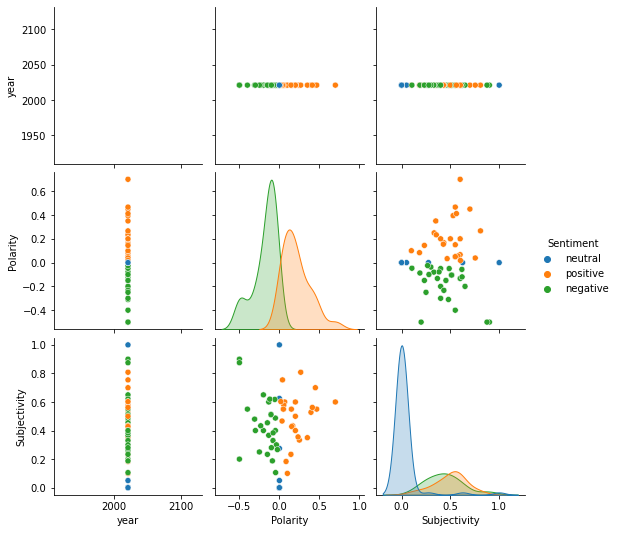

In [73]:
# Plotting the first Visual Diagram
plot_tables(data)

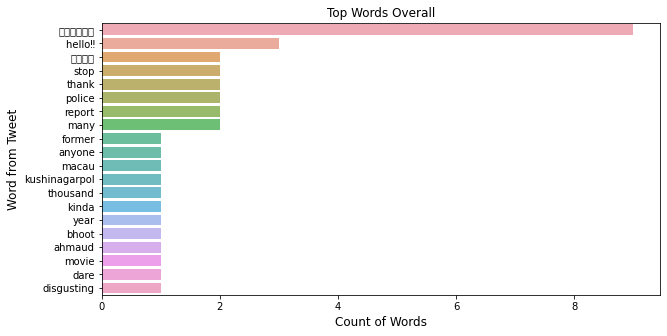

In [74]:
#@title Topic Analysis Additional Data

from nltk.probability import FreqDist

# Term Frequency Visualization
visualize_term_freq(data)

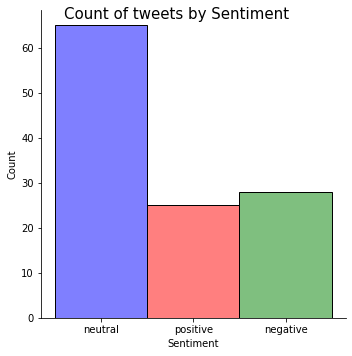

In [75]:

#Plotting Sentiment Distribution
plot_sentiment(data)